In [998]:
import pyodbc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [999]:
# Connect to the Database
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                        "Server=wd02;"
                        "Database=FootPrint;"
                        "Trusted_Connection=yes;")

# QUERY 01: Operations

In [1000]:
df = pd.read_sql_query("SELECT CONVERT(varchar,t.completedDateTime,100) Date, w.name warehouse, p.name project, oc.name operationCode, t.employee\
    FROM datex_footprint.Tasks t\
    JOIN datex_footprint.OperationCodes oc\
        ON oc.id = t.operationCodeId\
    JOIN datex_footprint.Warehouses w\
        ON w.id = t.warehouseId\
    JOIN datex_footprint.Projects p\
        ON p.id = t.projectId\
    WHERE (cast(t.completedDateTime as Date) = cast(getdate() as Date)) AND (t.employee != 'FootPrintService') AND (t.employee != 'Foot Print Service')\
    ORDER BY completedDateTime DESC", cnxn)

In [1001]:
# Adding Hours
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
df

,Date,warehouse,project,operationCode,employee,Hour
0,Mar 28 2022 3:50PM,10,Eywa Pharma Inc.,Picking,Frantz Laman,15
1,Mar 28 2022 3:49PM,18,"Blinc International, Inc.",Picking,Raul Bejarano,15
2,Mar 28 2022 3:49PM,15,"Brookfield Pharmaceuticals, LLC",Receiving,Tyler Gonzales,15
3,Mar 28 2022 3:49PM,15,"Brookfield Pharmaceuticals, LLC",Receiving,Yaima Castillo,15
4,Mar 28 2022 3:49PM,19,ACG North America LLC,Picking,Edwin Perez,15
...,...,...,...,...,...,...
3381,Mar 28 2022 7:44AM,20,Alumier Labs Inc.,Picking,Wendy Medrano,7
3382,Mar 28 2022 7:42AM,20,Alumier Labs Inc.,Picking,Wendy Medrano,7
3383,Mar 28 2022 7:40AM,20,Alumier Labs Inc.,Manual Pick Allocation,Maria Ramos,7
3384,Mar 28 2022 7:39AM,20,Alumier Labs Inc.,Manual Pick Allocation,Maria Ramos,7


### Warehouse Activity

In [1002]:
df_warehouse = df.groupby(['warehouse']).count()[['operationCode']]
df_warehouse.reset_index(inplace=True)
df_warehouse

,warehouse,operationCode
0,10,988
1,102,5
2,12,125
3,15,447
4,16,68
5,17,37
6,18,108
7,19,491
8,20,661
9,21,328


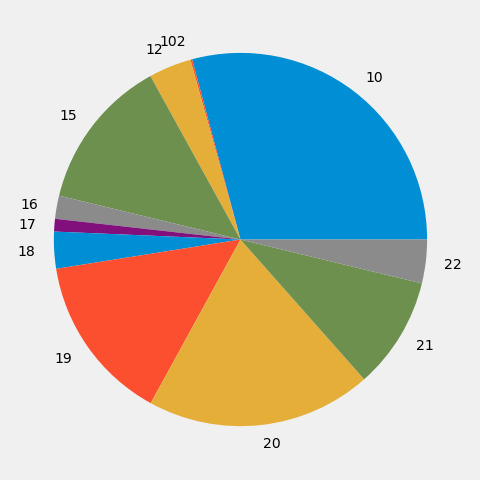

In [1003]:
warehouse = df_warehouse['warehouse']
activity = df_warehouse['operationCode']

plt.subplots(figsize=(8,8))
plt.pie(activity, labels=warehouse)
plt.show()

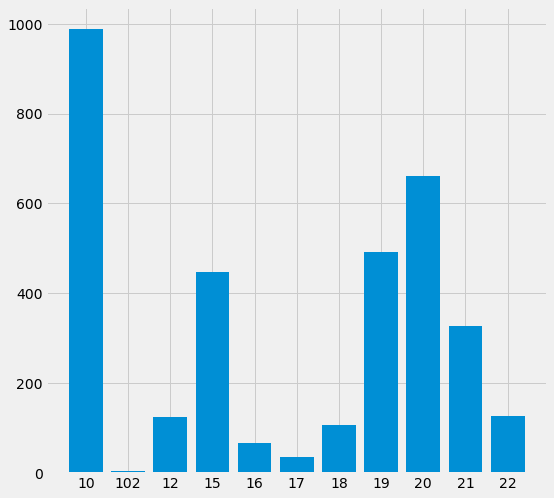

In [1004]:
warehouse = df_warehouse['warehouse']
activity = df_warehouse['operationCode']

plt.subplots(figsize=(8,8))
plt.bar(warehouse, activity)
plt.show()

In [1005]:
# Save Data in JSON format
df_warehouse_index = df_warehouse.set_index(['warehouse'])
df_warehouse_index.to_json('data/warehouse.json')
df_warehouse_index

,operationCode
warehouse,
10,988
102,5
12,125
15,447
16,68
17,37
18,108
19,491
20,661


### Operations type

In [1006]:
df_operation = df.groupby(['operationCode']).count()[['project']]
df_operation.reset_index(inplace=True)
df_operation

,operationCode,project
0,Batch Move,210
1,Count,50
2,Create Inventory,3
3,DONE RECEIVING,23
4,DRIVER CHECK IN,16
5,Finished Receiving,9
6,Inventory Adjustment,10
7,Lot Status Change,132
8,Manual Pick Allocation,223
9,Material Status Change,3


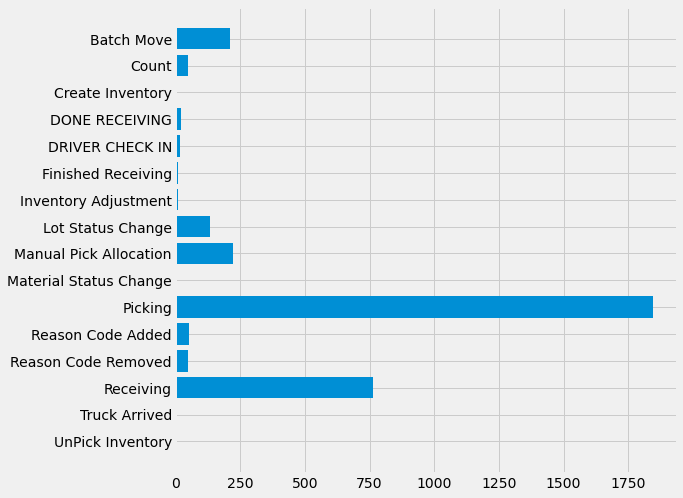

In [1007]:
values = df_operation['project']
operation = df_operation['operationCode']

plt.subplots(figsize=(8,8))
plt.barh(operation, values)
plt.gca().invert_yaxis()
plt.show()

In [1008]:
df_operation.rename(columns={"project": "Tasks"})
df_operation

,operationCode,project
0,Batch Move,210
1,Count,50
2,Create Inventory,3
3,DONE RECEIVING,23
4,DRIVER CHECK IN,16
5,Finished Receiving,9
6,Inventory Adjustment,10
7,Lot Status Change,132
8,Manual Pick Allocation,223
9,Material Status Change,3


In [1009]:
# Save Data in JSON format
df_operation = df_operation.rename(columns={"project": "Tasks"})
df_operation_index = df_operation.set_index(['operationCode'])
df_operation_index.to_json('data/operations_type.json')
df_operation_index

,Tasks
operationCode,
Batch Move,210
Count,50
Create Inventory,3
DONE RECEIVING,23
DRIVER CHECK IN,16
Finished Receiving,9
Inventory Adjustment,10
Lot Status Change,132
Manual Pick Allocation,223


### Operations per Hour

In [1010]:
df_hours = df.groupby(['Hour']).count()[['operationCode']]
df_hours.reset_index(inplace=True)
df_hours

,Hour,operationCode
0,7,54
1,8,177
2,9,384
3,10,429
4,11,535
5,12,463
6,13,423
7,14,463
8,15,458


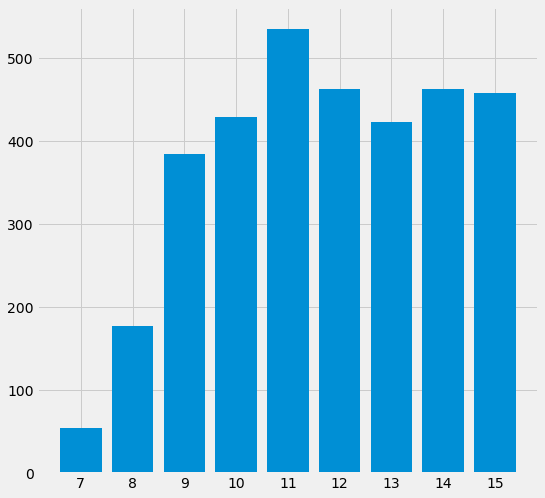

In [1011]:
hour = df_hours['Hour']
activity = df_hours['operationCode']

plt.subplots(figsize=(8,8))
plt.bar(hour, activity)
plt.xticks(hour)
plt.show()

In [1012]:
df_hours = df_hours.rename(columns={'operationCode': 'Operations'})
df_hours_index = df_hours.set_index(['Hour'])
df_hours_index.to_json('data/hours.json')
df_hours_index

,Operations
Hour,
7,54
8,177
9,384
10,429
11,535
12,463
13,423
14,463
15,458


# PICKING

In [1013]:
# Filtered by Picking
df_picking = df[df['operationCode'] == 'Picking']

In [1014]:
# Grouped by Employee and Hour
df_picking_grouped = df_picking.groupby(['employee', 'Hour']).count()[['operationCode']]
df_picking_grouped.reset_index(inplace=True)
df_picking_grouped.head()

,employee,Hour,operationCode
0,Aisha Cooper,8,3
1,Aisha Cooper,9,3
2,Aisha Cooper,10,4
3,Aisha Cooper,12,1
4,Aisha Cooper,15,4


In [1015]:
# Pivot
df_picking_pivoted = df_picking_grouped.pivot(index='employee', columns='Hour', values='operationCode')
df_picking_pivoted = df_picking_pivoted.fillna(0)
df_picking_pivoted = df_picking_pivoted.rename_axis(None, axis=1)
#df_picking_pivoted.reset_index(inplace=True)

df_picking_pivoted

,7,8,9,10,11,12,13,14,15
employee,,,,,,,,,
Aisha Cooper,0.0,3.0,3.0,4.0,0.0,1.0,0.0,0.0,4.0
Alejandro Aguirre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
Andre Nau,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0
Angel Luna,0.0,5.0,24.0,20.0,7.0,2.0,6.0,24.0,26.0
Angela Pena,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
Baldomero Ramos,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Brad Bacchetti,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
Carlos Gomez,0.0,0.0,17.0,0.0,17.0,7.0,0.0,0.0,2.0
Carly Potts,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Save in JSON File

In [1016]:
# Save into JSON
pickers = df_picking_pivoted.T
pickers.to_json('data/pickers.json')
pickers

employee,Aisha Cooper,Alejandro Aguirre,Andre Nau,Angel Luna,Angela Pena,Baldomero Ramos,Brad Bacchetti,Carlos Gomez,Carly Potts,Djenyson Sanon,...,Raul Bejarano,Reggie Bracken,Rita Geldres,Ronald Celis,Sergio Piura,Shannon Williamson,Wendy Medrano,William Trevino Trevino,Yaima Castillo,yudisel tubella
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0
8,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,13.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0
9,3.0,0.0,0.0,24.0,0.0,0.0,0.0,17.0,0.0,10.0,...,0.0,2.0,28.0,4.0,0.0,15.0,21.0,0.0,0.0,0.0
10,4.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,2.0,41.0,0.0,8.0,11.0
11,0.0,0.0,2.0,7.0,0.0,1.0,1.0,17.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,18.0,26.0,0.0,19.0,14.0
12,1.0,0.0,1.0,2.0,0.0,0.0,0.0,7.0,1.0,0.0,...,0.0,0.0,0.0,4.0,59.0,0.0,77.0,0.0,35.0,0.0
13,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0
14,0.0,0.0,0.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,...,19.0,2.0,0.0,0.0,4.0,0.0,84.0,16.0,0.0,0.0
15,4.0,3.0,0.0,26.0,0.0,0.0,4.0,2.0,0.0,0.0,...,16.0,1.0,0.0,0.0,0.0,0.0,59.0,5.0,0.0,7.0


# Picking By Warehouse Function

In [1066]:
# Picking Function
def picking_by_warehouse (warehouse):
    # Filter by warehouse
    df_w = df_picking[df_picking['warehouse'] == warehouse]
    
    # Grouped by Employee and Hour
    df_w_group = df_w.groupby(['employee', 'Hour']).count()[['operationCode']]
    df_w_group.reset_index(inplace=True)
    
    # Pivot
    df_w_pivot = df_w_group.pivot(index='employee', columns='Hour', values='operationCode')
    df_w_pivot = df_w_pivot.fillna(0)
    df_w_pivot = df_w_pivot.rename_axis(None, axis=1)
    #df_picking_10_pivoted.reset_index(inplace=True)
    #print(df_w_pivot)
    
    # Save into JSON
    pickers_df = df_w_pivot.T
    file_name = f'data/pickers_w{warehouse}.json'
    print(file_name)
    #pickers_df.to_json('data/pickers_w10.json')
    pickers_df.to_json(file_name)
    #print(pickers_df)
    
    

In [1068]:
picking_by_warehouse('10')
picking_by_warehouse('12')
picking_by_warehouse('15')
picking_by_warehouse('16')
picking_by_warehouse('18')
picking_by_warehouse('20')
picking_by_warehouse('21')
picking_by_warehouse('22')

data/pickers_w10.json
data/pickers_w12.json
data/pickers_w15.json
data/pickers_w16.json
data/pickers_w18.json
data/pickers_w20.json
data/pickers_w21.json
data/pickers_w22.json


# Picking and W-10

In [1017]:
# Filtered by Picking and Warehouse
df_picking_10 = df_picking[df_picking['warehouse'] == '10']
df_picking_10.head()

,Date,warehouse,project,operationCode,employee,Hour
0,Mar 28 2022 3:50PM,10,Eywa Pharma Inc.,Picking,Frantz Laman,15
13,Mar 28 2022 3:46PM,10,Eywa Pharma Inc.,Picking,Jairo Rincon,15
18,Mar 28 2022 3:46PM,10,Eywa Pharma Inc.,Picking,Frantz Laman,15
23,Mar 28 2022 3:45PM,10,Eywa Pharma Inc.,Picking,Frantz Laman,15
34,Mar 28 2022 3:43PM,10,Eywa Pharma Inc.,Picking,Frantz Laman,15


In [1018]:
# Grouped by Employee and Hour
df_picking_10_grouped = df_picking_10.groupby(['employee', 'Hour']).count()[['operationCode']]
df_picking_10_grouped.reset_index(inplace=True)
df_picking_10_grouped.head()

,employee,Hour,operationCode
0,Carlos Gomez,9,17
1,Carlos Gomez,11,17
2,Carlos Gomez,12,7
3,Carlos Gomez,15,2
4,Carly Potts,12,1


In [1019]:
# Pivot
df_picking_10_pivoted = df_picking_10_grouped.pivot(index='employee', columns='Hour', values='operationCode')
df_picking_10_pivoted = df_picking_10_pivoted.fillna(0)
df_picking_10_pivoted = df_picking_10_pivoted.rename_axis(None, axis=1)
#df_picking_10_pivoted.reset_index(inplace=True)

df_picking_10_pivoted

,8,9,10,11,12,13,14,15
employee,,,,,,,,
Carlos Gomez,0.0,17.0,0.0,17.0,7.0,0.0,0.0,2.0
Carly Potts,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Djenyson Sanon,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
Edilberto Souza,1.0,6.0,3.0,0.0,0.0,3.0,21.0,4.0
Frantz Laman,0.0,0.0,0.0,0.0,16.0,7.0,20.0,14.0
Hugo Gonzales,30.0,15.0,0.0,0.0,0.0,0.0,10.0,13.0
Jackson Pierre,0.0,0.0,0.0,0.0,0.0,62.0,38.0,0.0
Jairo Rincon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Jayalakshmi Arcot,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Save in JSON File

In [1020]:
# Save into JSON
pickers_W10 = df_picking_10_pivoted.T
pickers_W10.to_json('data/pickers_w10.json')
pickers_W10

employee,Carlos Gomez,Carly Potts,Djenyson Sanon,Edilberto Souza,Frantz Laman,Hugo Gonzales,Jackson Pierre,Jairo Rincon,Jayalakshmi Arcot,Nelson Hurtado,Rita Geldres,Ronald Celis,Sergio Piura
8,0.0,0.0,4.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0
9,17.0,0.0,10.0,6.0,0.0,15.0,0.0,0.0,0.0,0.0,28.0,4.0,0.0
10,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
11,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
12,7.0,1.0,0.0,0.0,16.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,59.0
13,0.0,0.0,0.0,3.0,7.0,0.0,62.0,0.0,0.0,2.0,0.0,0.0,3.0
14,0.0,0.0,0.0,21.0,20.0,10.0,38.0,0.0,0.0,14.0,0.0,0.0,4.0
15,2.0,0.0,0.0,4.0,14.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1021]:
df_picking_10_pivoted_T = df_picking_10_pivoted.T
df_picking_10_pivoted_T

employee,Carlos Gomez,Carly Potts,Djenyson Sanon,Edilberto Souza,Frantz Laman,Hugo Gonzales,Jackson Pierre,Jairo Rincon,Jayalakshmi Arcot,Nelson Hurtado,Rita Geldres,Ronald Celis,Sergio Piura
8,0.0,0.0,4.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0
9,17.0,0.0,10.0,6.0,0.0,15.0,0.0,0.0,0.0,0.0,28.0,4.0,0.0
10,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
11,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
12,7.0,1.0,0.0,0.0,16.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,59.0
13,0.0,0.0,0.0,3.0,7.0,0.0,62.0,0.0,0.0,2.0,0.0,0.0,3.0
14,0.0,0.0,0.0,21.0,20.0,10.0,38.0,0.0,0.0,14.0,0.0,0.0,4.0
15,2.0,0.0,0.0,4.0,14.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


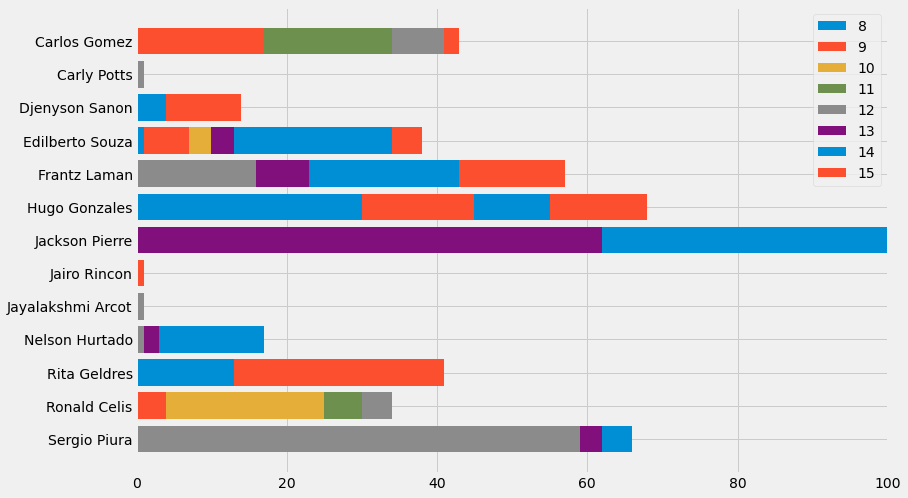

In [1022]:
# Horizontal Chart
labels = df_picking_10_pivoted_T.columns
fig, ax = plt.subplots(figsize=(12,8))

left_hour = [0.] * df_picking_10_pivoted_T.shape[1]

for i in df_picking_10_pivoted_T.index:
    ax.barh(labels, df_picking_10_pivoted_T.loc[i].values, left = left_hour)
    left_hour += df_picking_10_pivoted_T.loc[i].values

ax.legend(df_picking_10_pivoted_T.index)
plt.gca().invert_yaxis()
plt.show()

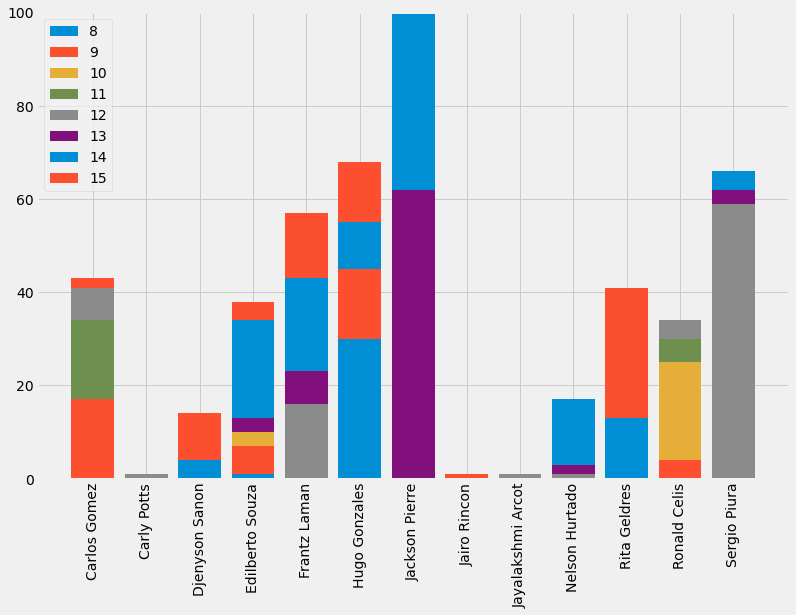

In [1023]:
# Vertical Chart
labels = df_picking_10_pivoted_T.columns
fig, ax = plt.subplots(figsize=(12,8))

bottom_hour = [0.] * df_picking_10_pivoted_T.shape[1]

for i in df_picking_10_pivoted_T.index:
    ax.bar(labels, df_picking_10_pivoted_T.loc[i].values, bottom = bottom_hour)
    bottom_hour += df_picking_10_pivoted_T.loc[i].values

ax.legend(df_picking_10_pivoted_T.index)

plt.xticks(rotation=90)
plt.show()

# Picking and W-20

In [1024]:
# Filtered by Picking and Warehouse
df_picking_20 = df_picking[df_picking['warehouse'] == '20']
df_picking_20.head()

,Date,warehouse,project,operationCode,employee,Hour
38,Mar 28 2022 3:42PM,20,Sartorius Stedim North America,Picking,Ernest Ferguson,15
103,Mar 28 2022 3:29PM,20,Alumier Labs Inc.,Picking,Wendy Medrano,15
106,Mar 28 2022 3:29PM,20,Alumier Labs Inc.,Picking,Wendy Medrano,15
107,Mar 28 2022 3:28PM,20,Alumier Labs Inc.,Picking,Wendy Medrano,15
109,Mar 28 2022 3:28PM,20,Alumier Labs Inc.,Picking,Wendy Medrano,15


In [1025]:
# Grouped by Employee and Hour
df_picking_20_grouped = df_picking_20.groupby(['employee', 'Hour']).count()[['operationCode']]
df_picking_20_grouped.reset_index(inplace=True)
df_picking_20_grouped.head()

,employee,Hour,operationCode
0,Aisha Cooper,8,3
1,Aisha Cooper,9,3
2,Aisha Cooper,10,4
3,Aisha Cooper,12,1
4,Aisha Cooper,15,4


In [1026]:
# Pivot
df_picking_20_pivoted = df_picking_20_grouped.pivot(index='employee', columns='Hour', values='operationCode')
df_picking_20_pivoted = df_picking_20_pivoted.fillna(0)
df_picking_20_pivoted = df_picking_20_pivoted.rename_axis(None, axis=1)
#df_picking_10_pivoted.reset_index(inplace=True)

df_picking_20_pivoted

,7,8,9,10,11,12,13,14,15
employee,,,,,,,,,
Aisha Cooper,0.0,3.0,3.0,4.0,0.0,1.0,0.0,0.0,4.0
Ernest Ferguson,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0,3.0
Gregory Watts,0.0,0.0,0.0,0.0,0.0,0.0,6.0,13.0,3.0
Reggie Bracken,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0
Wendy Medrano,19.0,52.0,21.0,41.0,26.0,77.0,14.0,84.0,59.0


### Save in JSON File

In [1027]:
pickers_W20 = df_picking_20_pivoted.T
pickers_W20.to_json('data/pickers_w20.json')
pickers_W20

employee,Aisha Cooper,Ernest Ferguson,Gregory Watts,Reggie Bracken,Wendy Medrano
7,0.0,0.0,0.0,0.0,19.0
8,3.0,0.0,0.0,0.0,52.0
9,3.0,2.0,0.0,2.0,21.0
10,4.0,1.0,0.0,0.0,41.0
11,0.0,3.0,0.0,0.0,26.0
12,1.0,0.0,0.0,0.0,77.0
13,0.0,0.0,6.0,0.0,14.0
14,0.0,1.0,13.0,2.0,84.0
15,4.0,3.0,3.0,1.0,59.0


In [1028]:
df_picking_20_pivoted_T = df_picking_20_pivoted.T
df_picking_20_pivoted_T

employee,Aisha Cooper,Ernest Ferguson,Gregory Watts,Reggie Bracken,Wendy Medrano
7,0.0,0.0,0.0,0.0,19.0
8,3.0,0.0,0.0,0.0,52.0
9,3.0,2.0,0.0,2.0,21.0
10,4.0,1.0,0.0,0.0,41.0
11,0.0,3.0,0.0,0.0,26.0
12,1.0,0.0,0.0,0.0,77.0
13,0.0,0.0,6.0,0.0,14.0
14,0.0,1.0,13.0,2.0,84.0
15,4.0,3.0,3.0,1.0,59.0


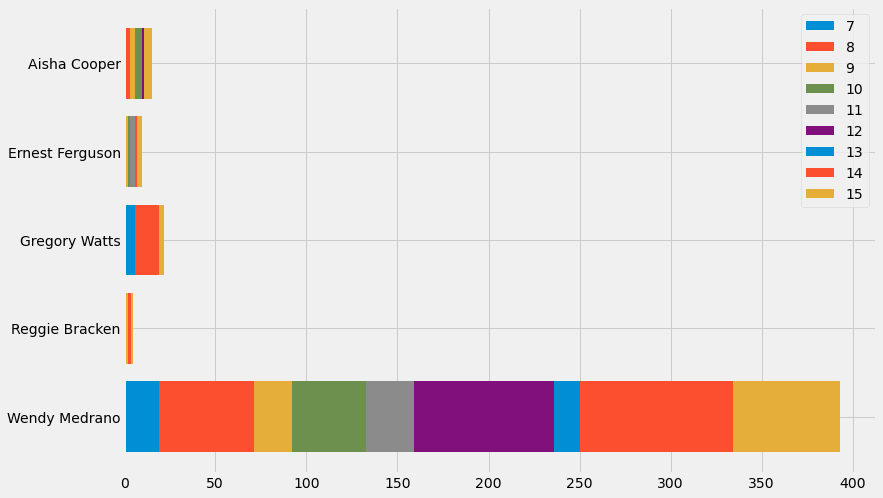

In [1029]:
# Horizontal Chart
labels = df_picking_20_pivoted_T.columns
fig, ax = plt.subplots(figsize=(12,8))

left_hour = [0.] * df_picking_20_pivoted_T.shape[1]

for i in df_picking_20_pivoted_T.index:
    ax.barh(labels, df_picking_20_pivoted_T.loc[i].values, left = left_hour)
    left_hour += df_picking_20_pivoted_T.loc[i].values

ax.legend(df_picking_20_pivoted_T.index)
plt.gca().invert_yaxis()
plt.show()

In [1030]:
df_picking_20_pivoted_T.index

Int64Index([7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

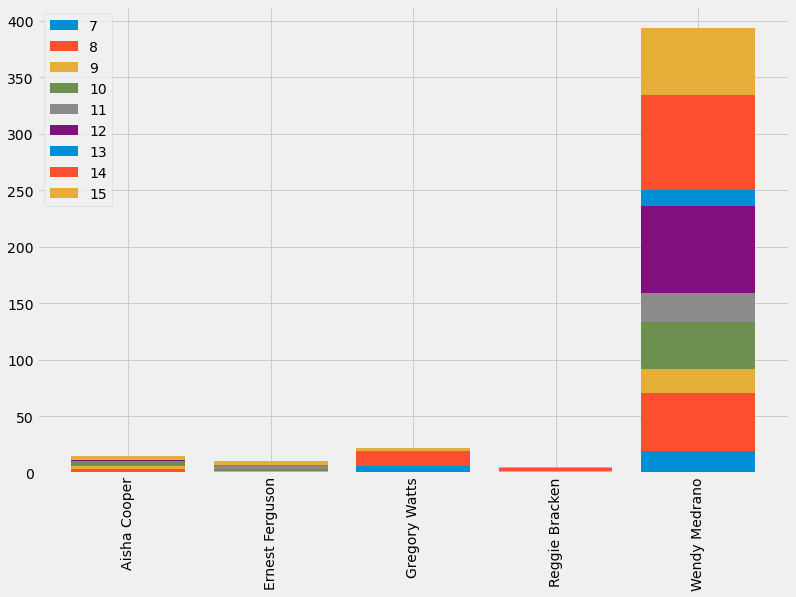

In [1031]:
# Vertical Chart
labels = df_picking_20_pivoted_T.columns
fig, ax = plt.subplots(figsize=(12,8))

bottom_hour = [0.] * df_picking_20_pivoted_T.shape[1]

for i in df_picking_20_pivoted_T.index:
    ax.bar(labels, df_picking_20_pivoted_T.loc[i].values, bottom = bottom_hour)
    bottom_hour += df_picking_20_pivoted_T.loc[i].values

ax.legend(df_picking_20_pivoted_T.index)

plt.xticks(rotation=90)
plt.show()

# QUERY 02: Open Outbounds

In [1032]:
df_02 = pd.read_sql_query("SELECT DISTINCT w.name warehouse, p.name project, s.lookupCode shipment_number, s.createdSysDateTime\
    FROM datex_footprint.shipments s\
    LEFT JOIN datex_footprint.ShipmentOrderLookup sol\
        on sol.shipmentId = s.id\
    LEFT JOIN datex_footprint.orders o\
        on o.id = sol.orderId\
    LEFT JOIN datex_footprint.Projects p\
        on p.id = o.projectId\
    LEFT JOIN datex_footprint.warehouses w\
        on w.id = isnull(s.actualWarehouseId, s.expectedWarehouseId)\
    WHERE s.statusId in (1, 2, 4) and s.typeId = 2\
    ORDER BY createdSysDateTime", cnxn)

In [1033]:
df_02

,warehouse,project,shipment_number,createdSysDateTime
0,17,"TherapeuticsMD, Inc.",489832,2017-07-26 09:09:09.197
1,19,"Novadoz Pharmaceuticals, LLC",1901075,2019-09-30 10:50:10.143
2,10,"Chadwick Pharmaceuticals, Inc.",2167054,2019-11-14 16:36:44.793
3,10,Eywa Pharma Inc.,2475492,2020-01-22 13:20:13.063
4,10,Eywa Pharma Inc.,2475493,2020-01-22 13:20:13.447
...,...,...,...,...
7682,10,ISDIN Corporation,0085551958,2022-03-28 15:50:10.887
7683,10,ISDIN Corporation,0085551957,2022-03-28 15:50:12.293
7684,10,ISDIN Corporation,0085551953,2022-03-28 15:50:13.623
7685,10,ISDIN Corporation,0085551956,2022-03-28 15:50:14.967


In [1034]:
df_02.dtypes

warehouse                     object
project                       object
shipment_number               object
createdSysDateTime    datetime64[ns]
dtype: object

In [1035]:
df_02['age_order'] = pd.Timestamp.now() - df_02['createdSysDateTime']
df_02

,warehouse,project,shipment_number,createdSysDateTime,age_order
0,17,"TherapeuticsMD, Inc.",489832,2017-07-26 09:09:09.197,1706 days 06:41:30.858948
1,19,"Novadoz Pharmaceuticals, LLC",1901075,2019-09-30 10:50:10.143,910 days 05:00:29.912948
2,10,"Chadwick Pharmaceuticals, Inc.",2167054,2019-11-14 16:36:44.793,864 days 23:13:55.262948
3,10,Eywa Pharma Inc.,2475492,2020-01-22 13:20:13.063,796 days 02:30:26.992948
4,10,Eywa Pharma Inc.,2475493,2020-01-22 13:20:13.447,796 days 02:30:26.608948
...,...,...,...,...,...
7682,10,ISDIN Corporation,0085551958,2022-03-28 15:50:10.887,0 days 00:00:29.168948
7683,10,ISDIN Corporation,0085551957,2022-03-28 15:50:12.293,0 days 00:00:27.762948
7684,10,ISDIN Corporation,0085551953,2022-03-28 15:50:13.623,0 days 00:00:26.432948
7685,10,ISDIN Corporation,0085551956,2022-03-28 15:50:14.967,0 days 00:00:25.088948


In [1036]:
df_02.dtypes

warehouse                      object
project                        object
shipment_number                object
createdSysDateTime     datetime64[ns]
age_order             timedelta64[ns]
dtype: object

In [1037]:
df_02['age_order_days'] = df_02['age_order'].dt.components['days']
df_02['age_order_hours'] = df_02['age_order'].dt.components['hours']
df_02

,warehouse,project,shipment_number,createdSysDateTime,age_order,age_order_days,age_order_hours
0,17,"TherapeuticsMD, Inc.",489832,2017-07-26 09:09:09.197,1706 days 06:41:30.858948,1706,6
1,19,"Novadoz Pharmaceuticals, LLC",1901075,2019-09-30 10:50:10.143,910 days 05:00:29.912948,910,5
2,10,"Chadwick Pharmaceuticals, Inc.",2167054,2019-11-14 16:36:44.793,864 days 23:13:55.262948,864,23
3,10,Eywa Pharma Inc.,2475492,2020-01-22 13:20:13.063,796 days 02:30:26.992948,796,2
4,10,Eywa Pharma Inc.,2475493,2020-01-22 13:20:13.447,796 days 02:30:26.608948,796,2
...,...,...,...,...,...,...,...
7682,10,ISDIN Corporation,0085551958,2022-03-28 15:50:10.887,0 days 00:00:29.168948,0,0
7683,10,ISDIN Corporation,0085551957,2022-03-28 15:50:12.293,0 days 00:00:27.762948,0,0
7684,10,ISDIN Corporation,0085551953,2022-03-28 15:50:13.623,0 days 00:00:26.432948,0,0
7685,10,ISDIN Corporation,0085551956,2022-03-28 15:50:14.967,0 days 00:00:25.088948,0,0


In [1038]:
bins =[-1,1,2,3,7,30,60, 90,365, 730,10000]
bin_names = ['24 Hours', '48 Hours', '72 Hours', '1 Week', '1 Month', '2 Months', '3 Months', '1 Year', '2 Years', 'More than 2 years']

df_02['age_group'] = pd.cut(df_02['age_order_days'], bins, labels=bin_names)

In [1039]:
df_02_grouped = df_02.groupby(['age_group'])[['project']].count()

In [1040]:
df_02_grouped = df_02_grouped.rename(columns={'project': 'orders'})

In [1041]:
df_02_grouped

,orders
age_group,
24 Hours,864
48 Hours,133
72 Hours,261
1 Week,842
1 Month,986
2 Months,704
3 Months,665
1 Year,2175
2 Years,996


### Save in JSON File

In [1042]:
open_outbounds = df_02_grouped
open_outbounds.to_json('data/open_outbounds.json')
open_outbounds

,orders
age_group,
24 Hours,864
48 Hours,133
72 Hours,261
1 Week,842
1 Month,986
2 Months,704
3 Months,665
1 Year,2175
2 Years,996


<AxesSubplot:ylabel='age_group'>

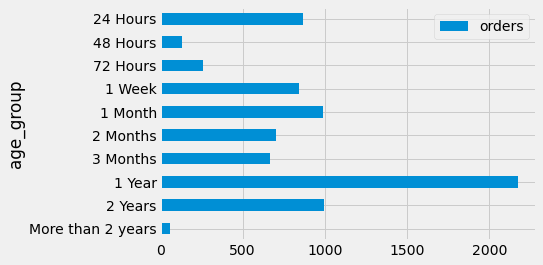

In [1043]:
df_02_grouped = df_02_grouped.iloc[::-1]
df_02_grouped.plot.barh()

In [1044]:
# Close connection
cnxn.close()